# Business Scenario:
You are a data analyst and your client has a large ecommerce company in India (let’s call it X). X gets a thousand orders via their website on a daily basis and they have to deliver them as fast as they can. For delivering the goods ordered by the customers, X has tied up with multiple courier companies in India as delivery partners who charge them some amount per delivery. The charges are dependent upon two factors: 

● Weight of the product 

● Distance between the warehouse (pickup location) and customer’s delivery address (destination location) 

On an average, the delivery charges are Rs. 100 per shipment. So if X ships 1,00,000 orders per month, they have to pay approximately Rs. 1 crore to the courier companies on a monthly basis as charges. 

As the amount that X has to pay to the courier companies is very high, they want to verify if the charges levied by their Delivery partners per Order are correct.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input Data 
**Left Hand Side (LHS) Data (X’s internal data spread across three reports)**

● Website order report- which will list Order IDs and various products (SKUs) part of each order. Order ID is common identifier between X’s order report and courier company invoice 

● Warehouse pincode to All India pincode mapping -(this should be used to figure out delivery zone (a/b/c/d/e) and during analysis compare against one reported by courier company in their CSV invoice per Order ID 

● SKU master with gross weight of each product. This should be used to calculate total weight of each order and during analysis compare against one reported by courier company in their CSV invoice per Order ID. The courier company calculates weight in slabs that is applicable for that delivery zone, so first you have to figure out the total weight of the shipment and then figure out applicable weight (based on zone’s weight slab)

**Company - Order Report**

In [106]:
data = pd.read_excel('/Users/mitssverma/Documents/Naukari.com/Assignment details/Company X - Order Report.xlsx')
data

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0
...,...,...,...
395,2001806229,8904223818942,1.0
396,2001806229,8904223818850,1.0
397,2001806226,8904223818850,2.0
398,2001806210,8904223816214,1.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ExternOrderNo,400.0,2.001811e+09,5187.698443,2.001806e+09,2.001807e+09,2.001809e+09,2.001812e+09,2.001827e+09
Order Qty,400.0,1.297500e+00,0.919842,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


- 400 data is present in dataset.
- No null Values present in dataset.
- ExternOrderNo is integer type.
- SKU is object type.
- Order Qty is float type

In [35]:
for i in data.columns:
    print(data[i].value_counts(),'\n','-'*50)

2001809820    14
2001827036     8
2001812854     8
2001821185     8
2001817093     8
              ..
2001814580     1
2001820690     1
2001806686     1
2001806823     1
2001807012     1
Name: ExternOrderNo, Length: 124, dtype: int64 
 --------------------------------------------------
8904223818850    60
8904223818706    59
8904223818942    41
8904223819468    24
8904223819024    17
                 ..
8904223819093     1
8904223817501     1
8904223819109     1
GIFTBOX202002     1
8904223818645     1
Name: SKU, Length: 65, dtype: int64 
 --------------------------------------------------
1.0    334
2.0     48
4.0     11
8.0      3
6.0      3
3.0      1
Name: Order Qty, dtype: int64 
 --------------------------------------------------


<AxesSubplot:xlabel='Order Qty', ylabel='count'>

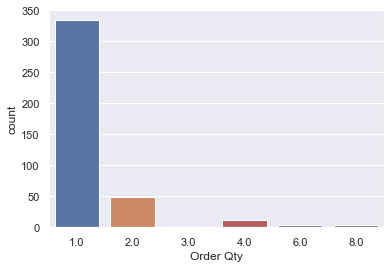

In [36]:
sns.countplot(data['Order Qty'])

In [37]:
col = ['ExternOrderNo','SKU']

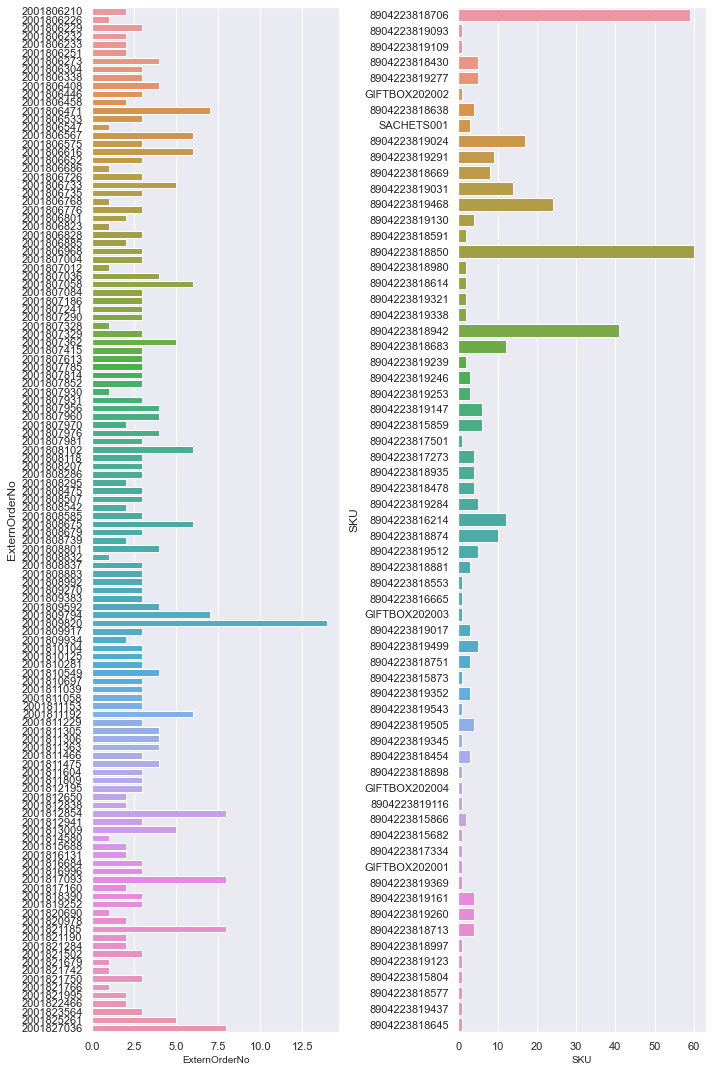

In [38]:
plt.figure(figsize = (10,15))
plotnumber = 1

for column in col:
    if plotnumber <= 2:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(y = data[column])
        plt.xlabel(column,fontsize = 10)
    
    plotnumber+=1
plt.tight_layout()

**Unique Values**
- ExternOrderNo. have 124 unique values.
- SKU have 65 unique values.
- Order Qty, 6 unique values.

**Highest**
- Order No. : 2001809820, is the highest no. of data in ExternOrderNo.
- 8904223818850, is the highest in SKU.
- Maximum Order Qty is 1.0

**Company - Pincode Zone**

In [39]:
data1 = pd.read_excel('/Users/mitssverma/Documents/Naukari.com/Assignment details/Company X - Pincode Zones.xlsx')
data1

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d
...,...,...,...
119,121003,325207,b
120,121003,303702,b
121,121003,313301,b
122,121003,173212,e


In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [41]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Warehouse Pincode,124.0,121003.000000,0.00000,121003.0,121003.0,121003.0,121003.00,121003.0
Customer Pincode,124.0,365488.072581,152156.32213,140301.0,302017.0,321304.5,405102.25,845438.0


- 124 data present in the dataset.
- No null values present.
- Warehouse Pincode and Customer Pincode are integer type.
- Zone is object type column.

In [42]:
for i in data1.columns:
    print(data1[i].value_counts(),'\n','-'*50)

121003    124
Name: Warehouse Pincode, dtype: int64 
 --------------------------------------------------
302017    5
313001    4
302002    2
302031    2
248001    2
         ..
723146    1
140604    1
831006    1
562110    1
313301    1
Name: Customer Pincode, Length: 108, dtype: int64 
 --------------------------------------------------
b    79
d    38
e     7
Name: Zone, dtype: int64 
 --------------------------------------------------


<AxesSubplot:xlabel='Zone', ylabel='count'>

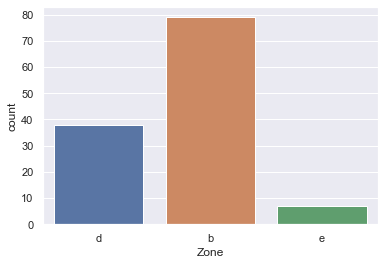

In [43]:
sns.countplot(data1['Zone'])

<AxesSubplot:xlabel='count', ylabel='Customer Pincode'>

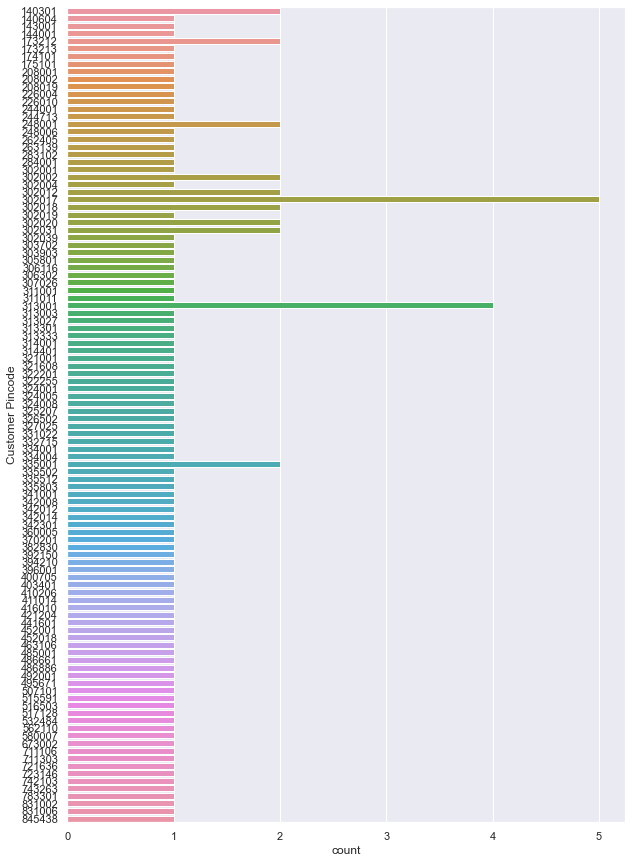

In [44]:
plt.figure(figsize = (10,15))
sns.countplot(y = data1['Customer Pincode'])

- There is only 1 warehouse pincode i.e. 121003.
- Customer Pincode has 108 unique values and Maximum is from 302017 customer pincode.
- 3 unique values in Zone and Maximum zone is b.

**Company - SKU Master**

In [45]:
data2 = pd.read_excel('/Users/mitssverma/Documents/Naukari.com/Assignment details/Company X - SKU Master.xlsx')
data2

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120
...,...,...
61,8904223819505,210
62,8904223819499,210
63,8904223819512,210
64,8904223819543,300


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [47]:
data2.describe()

,Weight (g)
count,66.000000
mean,219.742424
std,146.855482
min,10.000000
25%,116.250000
50%,165.000000
75%,290.000000
max,600.000000


- 66 data are present.
- No null values.
- SKU is object type.
- Weight (g) is integer type column.

In [48]:
for i in data2.columns:
    print(data2[i].value_counts(),'\n','-'*50)

GIFTBOX202002    2
8904223815682    1
8904223819291    1
8904223819116    1
8904223819161    1
                ..
8904223818997    1
8904223818942    1
8904223819024    1
8904223819031    1
SACHETS001       1
Name: SKU, Length: 65, dtype: int64 
 --------------------------------------------------
500    5
350    5
210    4
120    4
165    4
240    4
115    3
112    3
290    3
65     3
150    2
140    2
170    2
600    2
100    2
113    2
137    2
130    1
250    1
300    1
552    1
232    1
30     1
110    1
133    1
490    1
160    1
127    1
121    1
102    1
10     1
Name: Weight (g), dtype: int64 
 --------------------------------------------------


<AxesSubplot:xlabel='count', ylabel='Weight (g)'>

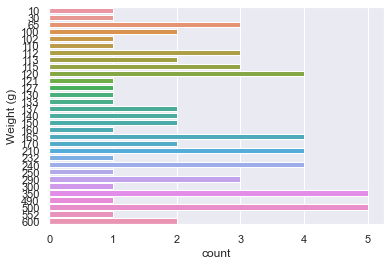

In [49]:
sns.countplot(y = data2['Weight (g)'])

<AxesSubplot:xlabel='count', ylabel='SKU'>

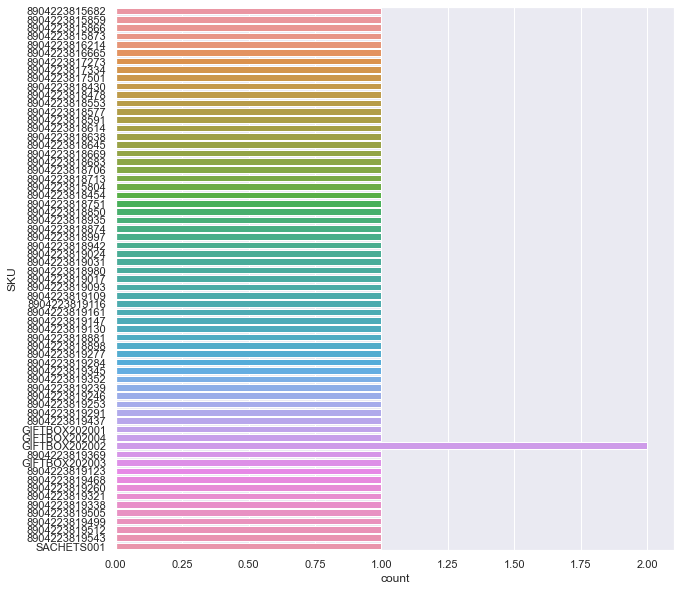

In [50]:
plt.figure(figsize = (10,10))
sns.countplot(y = data2['SKU'])

- Only SKU no. GIFTBOX202002 is twice a time, else others are single unit.
- Maximum weight(g) are 500g and 350g.

In [51]:
company = pd.merge(data, data2, on = 'SKU', how = 'inner')
company

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001821995,8904223818706,1.0,127
2,2001819252,8904223818706,1.0,127
3,2001816996,8904223818706,1.0,127
4,2001814580,8904223818706,1.0,127
...,...,...,...,...
396,2001806616,8904223819123,1.0,250
397,2001806567,8904223815804,1.0,160
398,2001806567,8904223818577,1.0,150
399,2001806408,8904223819437,2.0,552


**RHS Data (courier company invoice in CSV file)**

● Invoice in CSV file mentioning AWB Number (courier company’s own internal ID), Order ID (company X’s order ID), weight of shipment, warehouse pickup pincode, customer delivery pincode, zone of delivery, charges per shipment, type of shipment 

● Courier charges rate card at weight slab and pincode level. If the invoice mentions “Forward charges” then only forward charges (“fwd”) should be applicable as per zone and fixed & additional weights based on weight slabs. If the invoice mentions “Forward and rto charges” then forward charges (“fwd”) and RTO charges (“rto”) should be applicable as per zone and fixed & additional weights based on weight slabs. 

● For the first slab of that zone, “fixed” rate as per the slab is applicable. For each additional slab, “additional” weight in the same proportion is applicable. Total charges will be “fixed” + “total additional” if any. For example: weight 2.2KG, Zone C. So for Zone C the slab length = 0.75KG. So the total applicable weight = 2.25KG. For the first 0.75 KG the charge is “fwd”, and for each 0.75 after the first, charges will be additional charges.

In [52]:
data3 = pd.read_excel('/Users/mitssverma/Documents/Naukari.com/Assignment details/Courier Company - Invoice.xlsx')
data3

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


**Checking the value counts of columns**

In [60]:
col3 = ['AWB Code','Order ID','Charged Weight','Warehouse Pincode','Customer Pincode','Zone','Type of Shipment','Billing Amount (Rs.)']

In [61]:
for i in col3:
    print(data3[i].value_counts(),'\n','-'*50)

1091117222124    1
1091120962515    1
1091117227116    1
1091117222360    1
1091122418320    1
                ..
1091117222135    1
1091117222080    1
1091117222065    1
1091117221940    1
1091121846136    1
Name: AWB Code, Length: 124, dtype: int64 
 --------------------------------------------------
2001806232    1
2001821284    1
2001806768    1
2001806304    1
2001827036    1
             ..
2001806233    1
2001806229    1
2001806226    1
2001806210    1
2001811305    1
Name: Order ID, Length: 124, dtype: int64 
 --------------------------------------------------
0.50    11
0.68    10
1.00     7
0.70     6
0.15     6
0.72     6
0.80     5
0.20     5
0.79     4
0.60     4
0.69     4
0.67     3
0.73     2
1.30     2
1.50     2
1.10     2
0.76     2
0.71     2
1.13     2
0.59     2
1.60     2
1.20     2
1.08     2
0.82     1
1.86     1
0.61     1
2.10     1
0.66     1
0.30     1
1.04     1
2.94     1
2.47     1
2.28     1
0.74     1
4.13     1
1.63     1
1.02     1
1.35     1
0.77   

**Univariate Analysis**

<AxesSubplot:xlabel='Zone', ylabel='count'>

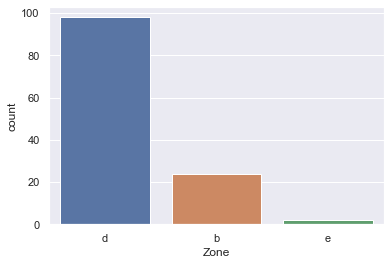

In [71]:
sns.countplot(x = data3['Zone'])

- The courier compny has to deliever only in 3 zones.
- Zone D has the highest amount of orders.
- Then Zone B
- And Zone E has the least amout of orders.

<AxesSubplot:xlabel='Type of Shipment', ylabel='count'>

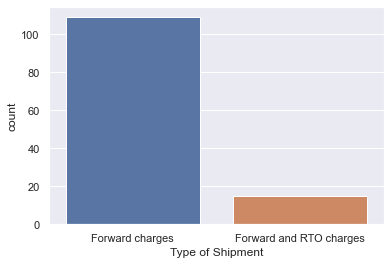

In [72]:
sns.countplot(x = data3['Type of Shipment'])

- Only 2 types of shipments are there 1. Forward charges. 2. Forward and RTO charges
- Forward and RTO charges are very less then Forward charges.

**Bivariate Analysis**

In [65]:
def scatter(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=data3)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between Zone and Customer Pincode


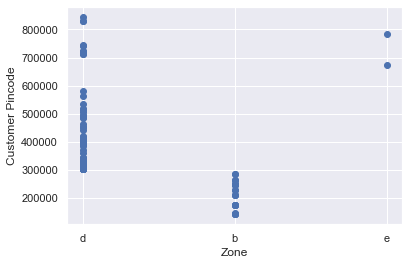

In [68]:
scatter (x = 'Zone', y = 'Customer Pincode', data = data3)

- Most of the customer are in zone d.
- Most of the pincodes are in zone d.

Scatterpot between Zone and Billing Amount (Rs.)


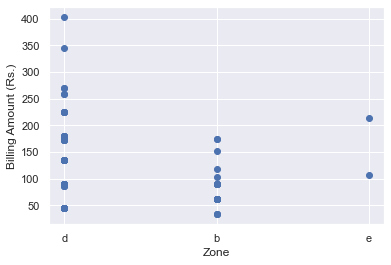

In [67]:
scatter (x = 'Zone', y = 'Billing Amount (Rs.)', data = data3)

**In terms of Billing Amount.**
- Billing amount for Zone d is from 50 to 400.
- Zone b billing amount is from 40 to 180.
- And Zone e is the lowest, as there are very less orders from that zone.

Scatterpot between Type of Shipment and Billing Amount (Rs.)


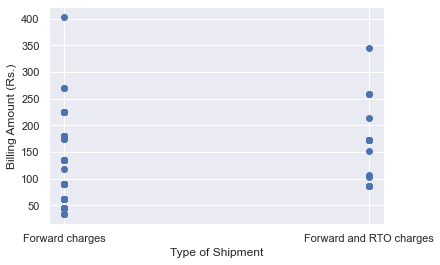

In [69]:
scatter (x = 'Type of Shipment', y = 'Billing Amount (Rs.)', data = data3)

**In terms of Billing Amount.**
- Foward charges are from range 40 to 400
- Forward charges and RTO charges are from range 90 to 350

Scatterpot between Charged Weight and Billing Amount (Rs.)


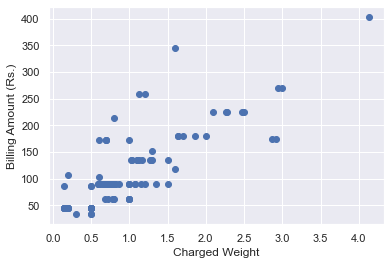

In [70]:
scatter (x = 'Charged Weight', y = 'Billing Amount (Rs.)', data = data3)

- Graph is in increasing order.
- As the weight increase, billing amount is also increasing.

**Mering Datasets.**

In [73]:
company.rename(columns = {'ExternOrderNo':'Order ID'}, inplace = True)

In [91]:
data4 = pd.merge(company, data3, on="Order ID",how = 'inner')

In [92]:
data4

,Order ID,SKU,Order Qty,Weight (g),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,2001827036,8904223818706,1.0,127,1091122418320,1.60,121003,173213,b,Forward charges,117.9
1,2001827036,8904223819093,1.0,150,1091122418320,1.60,121003,173213,b,Forward charges,117.9
2,2001827036,8904223819109,1.0,100,1091122418320,1.60,121003,173213,b,Forward charges,117.9
3,2001827036,8904223818430,1.0,165,1091122418320,1.60,121003,173213,b,Forward charges,117.9
4,2001827036,8904223819277,1.0,350,1091122418320,1.60,121003,173213,b,Forward charges,117.9
...,...,...,...,...,...,...,...,...,...,...,...
396,2001806251,8904223819161,1.0,115,1091117222146,1.27,121003,743263,d,Forward charges,135.0
397,2001806251,8904223819260,1.0,130,1091117222146,1.27,121003,743263,d,Forward charges,135.0
398,2001806233,8904223819161,1.0,115,1091117222135,0.78,121003,263139,b,Forward charges,61.3
399,2001806233,8904223819260,1.0,130,1091117222135,0.78,121003,263139,b,Forward charges,61.3


In [82]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              401 non-null    int64  
 1   SKU                   401 non-null    object 
 2   Order Qty             401 non-null    float64
 3   Weight (g)            401 non-null    int64  
 4   AWB Code              401 non-null    int64  
 5   Charged Weight        401 non-null    float64
 6   Warehouse Pincode     401 non-null    int64  
 7   Customer Pincode      401 non-null    int64  
 8   Zone                  401 non-null    object 
 9   Type of Shipment      401 non-null    object 
 10  Billing Amount (Rs.)  401 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 53.8+ KB


In [84]:
data4.describe()

,Order ID,Order Qty,Weight (g),AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Billing Amount (Rs.)
count,4.010000e+02,401.000000,401.000000,4.010000e+02,401.000000,401.0,401.000000,401.000000
mean,2.001811e+09,1.296758,181.566085,1.091118e+12,1.116534,121003.0,358744.940150,123.248130
std,5.244070e+03,0.918811,92.583321,1.534932e+06,0.712407,0.0,145882.764283,69.179298
min,2.001806e+09,1.000000,10.000000,1.091117e+12,0.150000,121003.0,140301.000000,33.000000
25%,2.001807e+09,1.000000,121.000000,1.091117e+12,0.680000,121003.0,302012.000000,89.600000
50%,2.001809e+09,1.000000,133.000000,1.091117e+12,0.800000,121003.0,314401.000000,90.200000
75%,2.001812e+09,1.000000,240.000000,1.091119e+12,1.300000,121003.0,410206.000000,151.100000
max,2.001827e+09,8.000000,600.000000,1.091122e+12,4.130000,121003.0,845438.000000,403.800000


<AxesSubplot:xlabel='Zone', ylabel='count'>

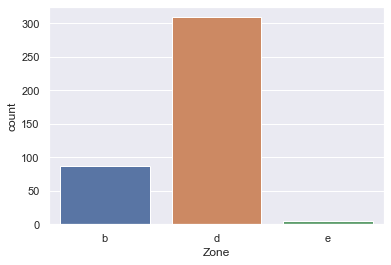

In [77]:
sns.countplot(x = data4['Zone'])

**No difference found**

<AxesSubplot:xlabel='Type of Shipment', ylabel='count'>

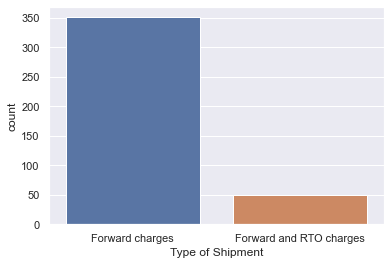

In [78]:
sns.countplot(data4['Type of Shipment'])

**No difference found**

<AxesSubplot:xlabel='count', ylabel='Weight (g)'>

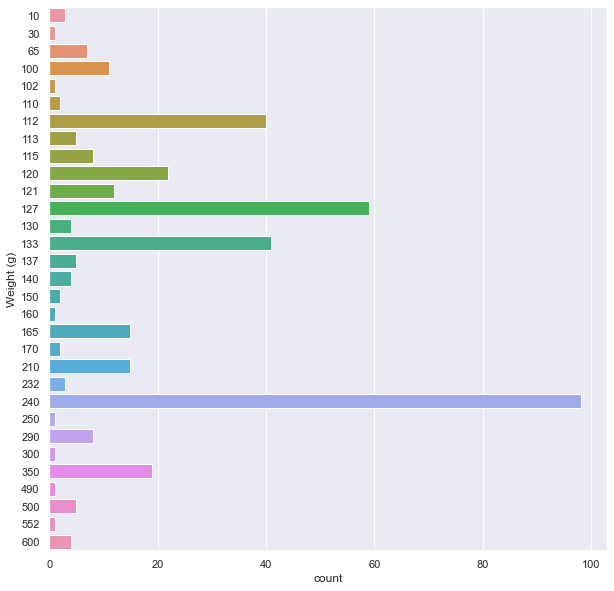

In [87]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Weight (g)', data = data4)

- Highest weightis 240 KG counts approx 96-98 times.
- Then 127 KG counts approx 56-58 times.
- Lowest count is 552 KG, 490 KG, 300 KG, 250 KG, 160 KG, 102 KG, 30 KG.

Scatterpot between Zone and Billing Amount (Rs.)


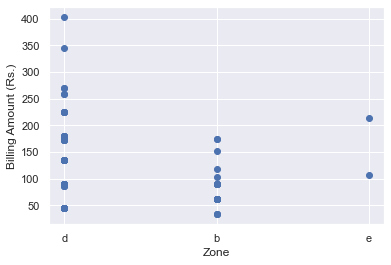

In [76]:
scatter(x = 'Zone', y = 'Billing Amount (Rs.)', data = data4)

**No difference found**

<AxesSubplot:xlabel='Zone', ylabel='Billing Amount (Rs.)'>

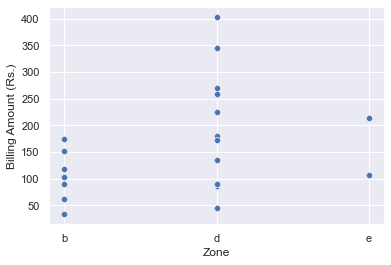

In [63]:
sns.scatterplot(x = data4['Zone'], y = data4['Billing Amount (Rs.)'])

**No difference found**

**Weight Slab**

In [776]:
data5

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.50,23.60,13.60,23.60
1,B,0.50,33.00,28.30,20.50,28.30
2,C,0.75,40.10,38.90,31.90,38.90
3,D,1.25,45.40,44.80,41.30,44.80
4,E,1.50,56.60,55.50,50.70,55.50


**Creating the expected dataset based on weight slab's data**

In [733]:
expected = pd.DataFrame({'Order ID':output['Order ID'],'Weight':output['Total weight as per X (KG)'],'Zone':output['Delivery Zone as per X'],'Shipment':output['Type of Shipment'],'slab':output['Weight slab as per X (KG)']})

**- Expected['round'] is the rounds of slabs it will take for particular weight.**

In [734]:
expected['round'] = expected['Weight']/expected['slab']

In [735]:
expected['round'] = expected['round'].apply(np.ceil)

In [736]:
expected['round'] = expected['round'].astype('int')

**- Forward Fixed Charge and Forward Additional Weight Slab Charge columns**

In [737]:
def condi_(x):
    if x == 'b':
        return 33.3
    
    elif x == 'd':
        return 45.4
    
    else:
        return 56.6

In [738]:
def condi_(x):
    if x == 'b':
        return 28.3
    
    elif x == 'd':
        return 44.8
    
    else:
        return 55.5

In [739]:
expected['FFC'] = expected['Zone'].apply(condi)

In [740]:
expected['FAW'] = expected['Zone'].apply(condi_)

**- Price Per Weight Column.**

In [741]:
df = []
for i in expected['round']:
    if i <= 1:
        df.append(expected['FFC']) 
    elif i == 2:
        df.append(expected['FFC']+expected['FAW'])
    else:
        while(i <= 1):
            a = expected['FFC']
            b = expected['FAW']
            for i in range(1, i-1):
                c = a + b
                a = b
                b = c
            df.append(b)

In [742]:
expected['Price per weight'] = df[0]

In [743]:
expected

,Order ID,Weight,Zone,Shipment,slab,round,FFC,FAW,Price per weight
0,2001827036,1.27,b,Forward charges,0.50,3,33.00,28.30,61.30
1,2001827036,1.50,b,Forward charges,0.50,3,33.00,28.30,61.30
2,2001827036,1.00,b,Forward charges,0.50,2,33.00,28.30,61.30
3,2001827036,1.65,b,Forward charges,0.50,4,33.00,28.30,61.30
4,2001827036,3.50,b,Forward charges,0.50,7,33.00,28.30,61.30
...,...,...,...,...,...,...,...,...,...
396,2001806251,1.15,d,Forward charges,1.25,1,45.40,44.80,90.20
397,2001806251,1.30,d,Forward charges,1.25,2,45.40,44.80,90.20
398,2001806233,1.15,b,Forward charges,0.50,3,33.00,28.30,61.30
399,2001806233,1.30,b,Forward charges,0.50,3,33.00,28.30,61.30


## **Output Dataset**

Create a resultant CSV/Excel file with the following columns:

● Order ID

● AWB Number

● Total weight as per X (KG)

● Weight slab as per X (KG)

● Total weight as per Courier Company (KG)

● Weight slab charged by Courier Company (KG)

● Delivery Zone as per X

● Delivery Zone charged by Courier Company

● Expected Charge as per X (Rs.)

● Charges Billed by Courier Company (Rs.)

● Difference Between Expected Charges and Billed Charges (Rs.)

In [729]:
output = pd.DataFrame({'Order ID' : data4['Order ID'],'AWB Number' : data4['AWB Code'],'Total weight as per X (KG)':data4['Weight (g)'],'Weight slab charged by Courier Company (KG)':data4['Charged Weight'],'Delivery Zone as per X':data4['Zone'],'Delivery Zone charged by Courier Company':data4['Zone'],'Type of Shipment':data4['Type of Shipment']})

In [730]:
output['Total weight as per X (KG)'] = output['Total weight as per X (KG)']/100

In [731]:
slab = []
for i in data4['Zone']:
    if i == 'b':
        slab.append(0.50)
        
    elif i == 'd':
        slab.append(1.25)
    
    else:
        slab.append(1.50)

In [732]:
output['Weight slab as per X (KG)'] = slab

In [744]:
output['Expected Charge as per X (Rs.)'] = expected['Price per weight']

In [745]:
output['Charges Billed by Courier Company (Rs.)'] = data4['Billing Amount (Rs.)']

In [746]:
output['Difference Between Expected Charges and Billed Charges (Rs.)'] = output['Charges Billed by Courier Company (Rs.)'] - output['Expected Charge as per X (Rs.)']

In [751]:
output.drop_duplicates(inplace = True)

**Final Output Dataset.**

In [777]:
output

,Order ID,AWB Number,Total weight as per X (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Type of Shipment,Weight slab as per X (KG),Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,1091122418320,1.27,1.60,b,b,Forward charges,0.50,61.30,117.90,56.60
1,2001827036,1091122418320,1.50,1.60,b,b,Forward charges,0.50,61.30,117.90,56.60
2,2001827036,1091122418320,1.00,1.60,b,b,Forward charges,0.50,61.30,117.90,56.60
3,2001827036,1091122418320,1.65,1.60,b,b,Forward charges,0.50,61.30,117.90,56.60
4,2001827036,1091122418320,3.50,1.60,b,b,Forward charges,0.50,61.30,117.90,56.60
...,...,...,...,...,...,...,...,...,...,...,...
396,2001806251,1091117222146,1.15,1.27,d,d,Forward charges,1.25,90.20,135.00,44.80
397,2001806251,1091117222146,1.30,1.27,d,d,Forward charges,1.25,90.20,135.00,44.80
398,2001806233,1091117222135,1.15,0.78,b,b,Forward charges,0.50,61.30,61.30,0.00
399,2001806233,1091117222135,1.30,0.78,b,b,Forward charges,0.50,61.30,61.30,0.00


In [778]:
output.to_csv('Final_output.csv')

**Final Result**

In [708]:
data6 = pd.read_excel('/Users/mitssverma/Documents/Naukari.com/Assignment details/Expected_Result.xlsx')
data6

,Unnamed: 0,Count,Amount
0,Total Orders - Correctly Charged,1.0,135.0
1,Total Orders - Over Charged,1.0,-141.5
2,Total Orders - Under Charged,NaN,NaN


**- Counts for Correctly Charged**

In [657]:
x_equal = 0
for i in output['Difference Between Expected Charges and Billed Charges (Rs.)']:
    if i == 0:
        x_equal += 1
x_equal

21

**- Counts and Amount of Over Charger.**

In [658]:
x_over = 0
for i in output['Difference Between Expected Charges and Billed Charges (Rs.)']:
    if i > 0:
        x_over += 1
x_over

265

In [753]:
x = []
for i in output['Difference Between Expected Charges and Billed Charges (Rs.)']:
    if i > 0:
        x.append(i)
over = sum(x)

**- Counts and Amount of Under Charger.**

In [659]:
x_under = 0
for i in output['Difference Between Expected Charges and Billed Charges (Rs.)']:
    if i < 0:
        x_under += 1
x_under

47

In [773]:
y = []
for i in output['Difference Between Expected Charges and Billed Charges (Rs.)']:
    if i < 0:
        y.append(i)
under = sum(y)

In [770]:
data6['Count'][0] = x_equal
data6['Count'][1] = x_over
data6['Count'][2] = x_under

In [779]:
data6['Amount'][0] = np.nan
data6['Amount'][1] = over
data6['Amount'][2] = under

**-Final Results**

In [780]:
data6

,Unnamed: 0,Count,Amount
0,Total Orders - Correctly Charged,21.00,NaN
1,Total Orders - Over Charged,265.00,12000.90
2,Total Orders - Under Charged,47.00,-1612.80


In [781]:
data6.to_csv('Final_result.csv')